
    This Source Code Form is subject to the terms of the Mozilla Public
    License, v. 2.0. If a copy of the MPL was not distributed with this
    file, You can obtain one at http://mozilla.org/MPL/2.0/.


In [1]:
# Enable automatic module reload
%load_ext autoreload
%autoreload 2

# To ease the loading of modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Load BEACS module
from beacs.agents.beacs import BEACS, Configuration

# Load Metrics
from example.metrics.MazeMetrics import \
    _maze_metrics, \
    _how_many_peps_match_non_aliased_states, \
    _mean_reliable_classifier_specificity, \
    _when_full_knowledge_is_achieved, \
    _enhanced_effect_error

# Load Plotting Wrappers
from example.metrics.MazePlottingWrapper import \
    parse_metrics_to_df, \
    plot_performance

# Load environments
import gym
import my_mazes

# Agent - BEACS

## Common parameters

In [2]:
#Environmental Set Up
RANDOM_ATTRIBUTE_LENGTH = 0
CLASSIFIER_LENGTH = 8 + RANDOM_ATTRIBUTE_LENGTH
NUMBER_OF_POSSIBLE_ACTIONS = 8
SLIPPERY_PROB = 0.
MAZE = "Maze10-v0"

#Exploration Set Up
NUMBER_OF_EXPLORE_TRIALS = 2500
METRICS_TRIAL_FREQUENCY_EXPLORE = 100
EPSILON = 0.8
BETA_ALP = 0.05

#Exploitation Set Up
NUMBER_OF_EXPLOIT_TRIALS_NO_RL = 500
BETA_EXPLOIT_NO_RL = 0.05
NUMBER_OF_EXPLOIT_TRIALS_RL_START = 500
BETA_EXPLOIT_RL_START = 0.05
NUMBER_OF_EXPLOIT_TRIALS_RL = 500
BETA_EXPLOIT_RL = 0.05

#RL Set Up
GAMMA = 0.95
BETA_RL = 0.05

#GA Set Up
CROSSOVER = 0.8
MUTATION = 0.3

#BEACS Set Up
ENABLE_PEP = True
LENGTH_OF_BEHAVIORAL_SEQUENCES = 2

## Environment - Maze

In [3]:
# Initialize environment
maze = gym.make(MAZE)
# Set up probability to do a random action
maze.env.set_prob_slippery(SLIPPERY_PROB)
# Set up random attribute length
maze.env.set_random_attribute_length(RANDOM_ATTRIBUTE_LENGTH)
# Reset it, by putting an agent into random position
maze.reset()
# Render the state in ASCII
maze.render('aliasing_human')
# Get environmental state transitions
#maze.env.get_theoritical_probabilities()


■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ ■ ■ ■ ■ ■ □ ■
■ A ■ ■ ■ ■ ■ □ ■
■ ■ ■ □ ■ ■ ■ ■ ■
■ ■ ■ $ ■ ■ ■ ■ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


## Training of BEACS - Exploration

In [4]:
%%time
#%%prun -l 0.5 -T profiling.txt

cfg_explore = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=METRICS_TRIAL_FREQUENCY_EXPLORE,
    do_pep=ENABLE_PEP,
    beta_alp=BETA_ALP,
    beta_rl=BETA_RL,
    gamma=GAMMA,
    epsilon=EPSILON,
    u_max=CLASSIFIER_LENGTH,
    mu=MUTATION,
    chi=CROSSOVER,
    bs_max=LENGTH_OF_BEHAVIORAL_SEQUENCES
)

agent_explore = BEACS(cfg_explore)
population_explore, metrics_explore = agent_explore.explore(maze, NUMBER_OF_EXPLORE_TRIALS)

CPU times: user 1min 15s, sys: 545 ms, total: 1min 16s
Wall time: 1min 19s


### Performance

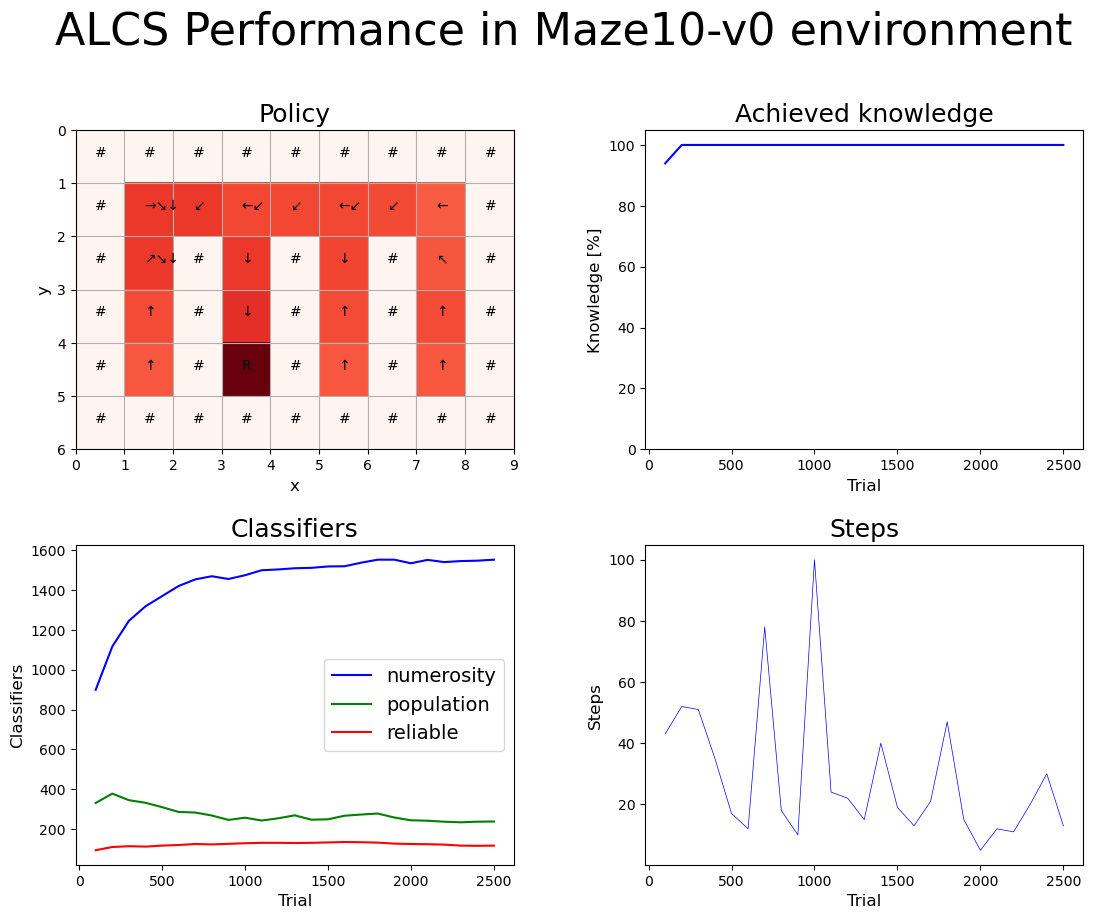

In [5]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, None, None)
plot_performance(agent_explore, maze, metrics_df, cfg_explore, MAZE, metrics_trial_frequency_explore, None)

In [6]:
duplicate_population_explore = agent_explore.duplicate_population()
agent_explore.zip_population()
population_explore = agent_explore.get_population()

print("There are ", _how_many_peps_match_non_aliased_states(population_explore, maze),
      " enhanced classifer(s) that match a non-aliased states.\n")

print(_maze_metrics(duplicate_population_explore, maze))
print(_maze_metrics(population_explore, maze))

print("Mean reliable population specifity is ",
      _mean_reliable_classifier_specificity(duplicate_population_explore, maze))
print("Mean reliable population specifity is ",
      _mean_reliable_classifier_specificity(population_explore, maze))

pep_error = _enhanced_effect_error(duplicate_population_explore, maze, CLASSIFIER_LENGTH, RANDOM_ATTRIBUTE_LENGTH)
print("Accumulated Error on PEP Probabilities :", pep_error, "%")
pep_error = _enhanced_effect_error(population_explore, maze, CLASSIFIER_LENGTH, RANDOM_ATTRIBUTE_LENGTH)
print("Accumulated Error on PEP Probabilities :", pep_error, "%")

There are  0  enhanced classifer(s) that match a non-aliased states.

{'knowledge': 100.0, 'population': 238, 'numerosity': 1552, 'reliable': 117}
{'knowledge': 100.0, 'population': 97, 'numerosity': 1148, 'reliable': 77}
Mean reliable population specifity is  (0.5512820512820513, 0.39035087719298245, 0.7041666666666667)
Mean reliable population specifity is  (0.4805194805194805, 0.31547619047619047, 0.6785714285714286)
Accumulated Error on PEP Probabilities : 0.13250586602739084 %
Accumulated Error on PEP Probabilities : 0.13250586602739084 %


In [7]:
population_explore.sort(key=lambda cl: -cl.fitness)
population_explore_to_display = [cl for cl in population_explore]
for cl in population_explore_to_display:
    print(cl)
    print("\n")

C:####9### A:4 None E:(####1###:1)
q: 1.0    ra: 1e+03  rb: 1e+03  ir: 1e+03  f: 1e+03  err: 1.137e-12
exp: 2157  num: 20 ee: False
Mark: empty Can_be_generalized: [True, True, True, True, True, True, True, True] Aliased_state:  PAI_state: 
tga: 79883 tbseq: 12035 talp: 79896 tav: 20.79  



C:#0110111 A:1 [3, 4] E:(#1##9###:1)
q: 1.0    ra: 950.0  rb: 950.0  ir: 0.0    f: 950.0  err: 2.747e-06
exp: 791   num: 20 ee: False
Mark: empty Can_be_generalized: [True, True, True, True, True, True, True, True] Aliased_state:  PAI_state: 11001001
tga: 79809 tbseq: 14018 talp: 79809 tav: 58.07  



C:1##1011# A:2 [3, 4] E:(0#1#9###:1)
q: 1.0    ra: 949.9  rb: 949.9  ir: 0.0    f: 949.9  err: 0.1848
exp: 350   num: 20 ee: False
Mark: empty Can_be_generalized: [True, True, True, True, True, True, True, True] Aliased_state:  PAI_state: 11001001
tga: 79883 tbseq: 11460 talp: 79883 tav: 75.03  



C:###1#### A:5 None E:(########:1)
q: 1.0    ra: 907.8  rb: 877.5  ir: 0.0    f: 907.8  err: 58.03 
exp:

In [8]:
agent_explore.get_pai_states_memory()

[('0', '0', '1', '1', '0', '1', '1', '0'),
 ('1', '1', '0', '0', '1', '0', '0', '1'),
 ('0', '1', '1', '1', '0', '1', '1', '1')]

### Configuration of Exploitation

In [9]:
cfg_exploit_no_rl = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    beta_rl=BETA_EXPLOIT_NO_RL,
    gamma=GAMMA,
    epsilon=0.2
)

cfg_exploit_rl_start = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    beta_rl=BETA_EXPLOIT_RL_START,
    gamma=GAMMA,
    epsilon=0.0
)

cfg_exploit_rl = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    beta_rl=BETA_EXPLOIT_RL,
    gamma=GAMMA,
    epsilon=0.0,
)

### Utilities

In [10]:
def print_avg_steps(metrics_exploit_no_rl, metrics_exploit_rl_start, metrics_exploit_rl, NUMBER_OF_EXPLOIT_TRIALS_NO_RL, NUMBER_OF_EXPLOIT_TRIALS_RL_START, NUMBER_OF_EXPLOIT_TRIALS_RL):

    avg_step_exploit_no_rl = 0
    for trial in metrics_exploit_no_rl:
        avg_step_exploit_no_rl += trial['steps_in_trial']
    avg_step_exploit_no_rl /= NUMBER_OF_EXPLOIT_TRIALS_NO_RL
    print("Average number of steps to solve the maze is ",avg_step_exploit_no_rl,
          " for a total of ", NUMBER_OF_EXPLOIT_TRIALS_NO_RL, " trials in EXPLOITATION without Reinforcement Module")

    avg_step_exploit_rl_start = 0
    for trial in metrics_exploit_rl_start:
        avg_step_exploit_rl_start += trial['steps_in_trial']
    avg_step_exploit_rl_start /= NUMBER_OF_EXPLOIT_TRIALS_RL_START
    print("Average number of steps to solve the maze is ",avg_step_exploit_rl_start,
          " for a total of ", NUMBER_OF_EXPLOIT_TRIALS_RL_START, " trials in EXPLOITATION starting Reinforcement Module")

    avg_step_exploit_rl = 0
    for trial in metrics_exploit_rl:
        avg_step_exploit_rl += trial['steps_in_trial']
    avg_step_exploit_rl /= NUMBER_OF_EXPLOIT_TRIALS_RL
    print("Average number of steps to solve the maze is ",avg_step_exploit_rl,
          " for a total of ", NUMBER_OF_EXPLOIT_TRIALS_RL, " trials in EXPLOITATION with Reinforcement Module")

## Training of BEACS - Uncompressed Population Exploitation

In [11]:
%%time

duplicate_agent_exploit_no_rl = BEACS(cfg_exploit_no_rl, duplicate_population_explore)
duplicate_population_exploit_no_rl, duplicate_metrics_exploit_no_rl = duplicate_agent_exploit_no_rl.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_NO_RL)

CPU times: user 4.33 s, sys: 63.8 ms, total: 4.39 s
Wall time: 4.62 s


In [12]:
%%time

duplicate_agent_exploit_rl_start = BEACS(cfg_exploit_rl_start, duplicate_population_exploit_no_rl)
duplicate_population_exploit_rl_start, duplicate_metrics_exploit_rl_start = duplicate_agent_exploit_rl_start.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_RL_START)

CPU times: user 3.67 s, sys: 30.8 ms, total: 3.7 s
Wall time: 3.8 s


In [13]:
%%time

duplicate_agent_exploit_rl = BEACS(cfg_exploit_rl, duplicate_population_exploit_rl_start)
duplicate_population_exploit_rl, duplicate_metrics_exploit_rl = duplicate_agent_exploit_rl.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_RL)

CPU times: user 3.5 s, sys: 15.5 ms, total: 3.52 s
Wall time: 3.56 s


## Training of BEACS - Compressed Population Exploitation

In [14]:
%%time

agent_exploit_no_rl = BEACS(cfg_exploit_no_rl, population_explore)
population_exploit_no_rl, metrics_exploit_no_rl = agent_exploit_no_rl.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_NO_RL)

CPU times: user 2.78 s, sys: 14.1 ms, total: 2.79 s
Wall time: 2.83 s


In [15]:
%%time

agent_exploit_rl_start = BEACS(cfg_exploit_rl_start, population_exploit_no_rl)
population_exploit_rl_start, metrics_exploit_rl_start = agent_exploit_rl_start.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_RL_START)

CPU times: user 2.41 s, sys: 6.28 ms, total: 2.42 s
Wall time: 2.43 s


In [16]:
%%time

agent_exploit_rl = BEACS(cfg_exploit_rl, population_exploit_rl_start)
population_exploit_rl, metrics_exploit_rl = agent_exploit_rl.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_RL)

CPU times: user 2.48 s, sys: 13.7 ms, total: 2.5 s
Wall time: 2.53 s


#### Performance

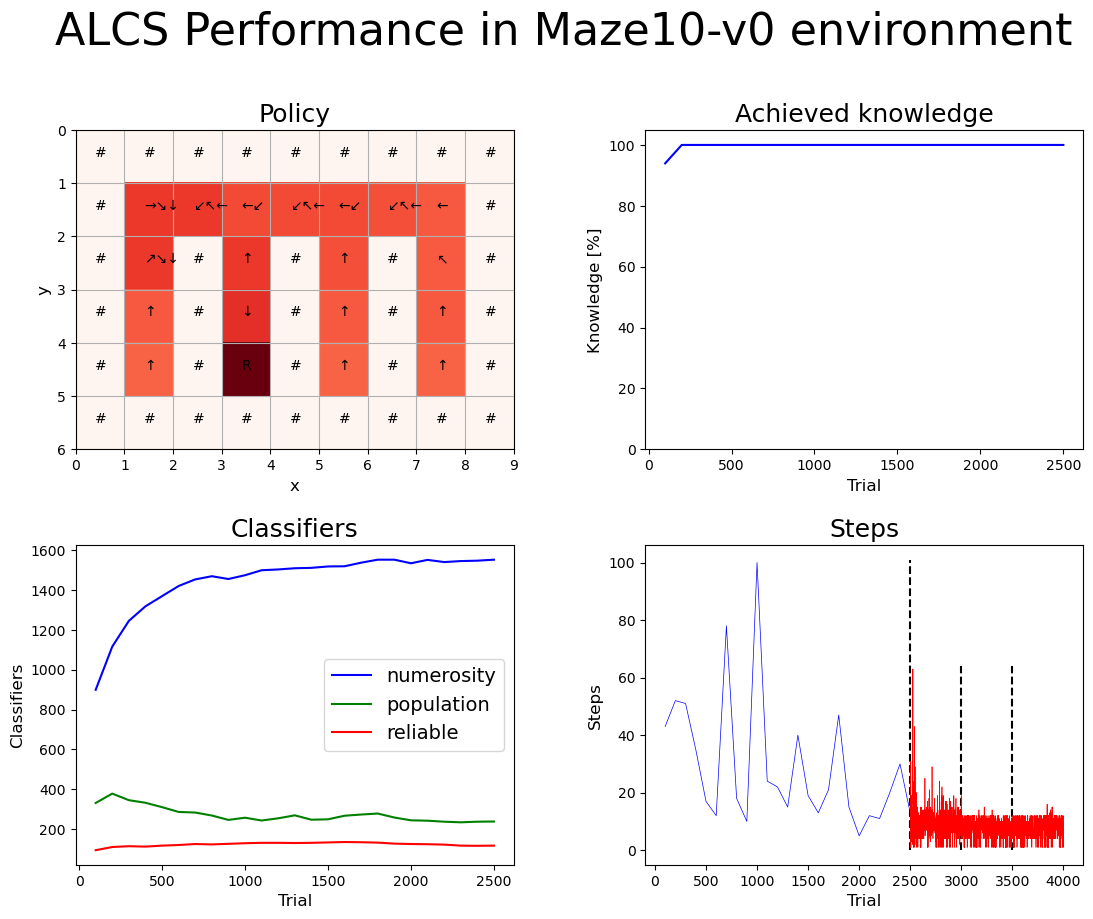

In [17]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency
metrics_trial_frequency_exploit = 1

duplicate_metrics_exploit = duplicate_metrics_exploit_no_rl.copy()
for idx, item in enumerate(duplicate_metrics_exploit_rl_start):
    tmp = item.copy()
    tmp['trial'] += NUMBER_OF_EXPLOIT_TRIALS_NO_RL
    duplicate_metrics_exploit.append(tmp)
for idx, item in enumerate(duplicate_metrics_exploit_rl):
    tmp = item.copy()
    tmp['trial'] += NUMBER_OF_EXPLOIT_TRIALS_NO_RL + NUMBER_OF_EXPLOIT_TRIALS_RL_START
    duplicate_metrics_exploit.append(tmp)

duplicate_metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, duplicate_metrics_exploit, metrics_trial_frequency_exploit)
plot_performance(duplicate_agent_exploit_rl, maze, duplicate_metrics_df, cfg_exploit_rl, MAZE, metrics_trial_frequency_explore, [NUMBER_OF_EXPLOIT_TRIALS_NO_RL,NUMBER_OF_EXPLOIT_TRIALS_RL_START,NUMBER_OF_EXPLOIT_TRIALS_RL])

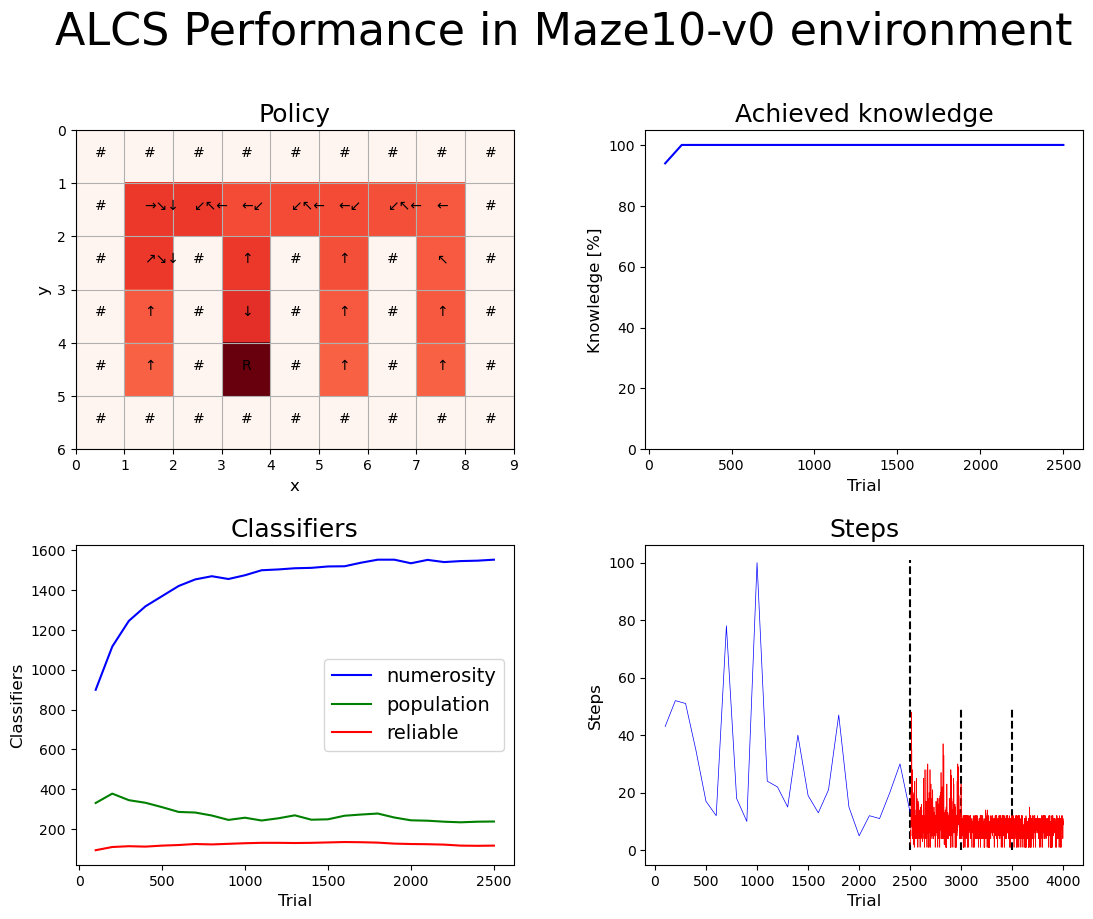

In [18]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency
metrics_trial_frequency_exploit = 1

metrics_exploit = metrics_exploit_no_rl.copy()
for idx, item in enumerate(metrics_exploit_rl_start):
    tmp = item.copy()
    tmp['trial'] += NUMBER_OF_EXPLOIT_TRIALS_NO_RL
    metrics_exploit.append(tmp)
for idx, item in enumerate(metrics_exploit_rl):
    tmp = item.copy()
    tmp['trial'] += NUMBER_OF_EXPLOIT_TRIALS_NO_RL + NUMBER_OF_EXPLOIT_TRIALS_RL_START
    metrics_exploit.append(tmp)

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, metrics_exploit, metrics_trial_frequency_exploit)
plot_performance(agent_exploit_rl, maze, metrics_df, cfg_exploit_rl, MAZE, metrics_trial_frequency_explore, [NUMBER_OF_EXPLOIT_TRIALS_NO_RL,NUMBER_OF_EXPLOIT_TRIALS_RL_START,NUMBER_OF_EXPLOIT_TRIALS_RL])

In [19]:
print_avg_steps(duplicate_metrics_exploit_no_rl, duplicate_metrics_exploit_rl_start, duplicate_metrics_exploit_rl,
                NUMBER_OF_EXPLOIT_TRIALS_NO_RL, NUMBER_OF_EXPLOIT_TRIALS_RL_START, NUMBER_OF_EXPLOIT_TRIALS_RL)

print(_maze_metrics(duplicate_population_explore, maze))
print(_maze_metrics(duplicate_population_exploit_no_rl, maze))
print(_maze_metrics(duplicate_population_exploit_rl_start, maze))
print(_maze_metrics(duplicate_population_exploit_rl, maze))

Average number of steps to solve the maze is  9.49  for a total of  500  trials in EXPLOITATION without Reinforcement Module
Average number of steps to solve the maze is  7.776  for a total of  500  trials in EXPLOITATION starting Reinforcement Module
Average number of steps to solve the maze is  7.916  for a total of  500  trials in EXPLOITATION with Reinforcement Module
{'knowledge': 100.0, 'population': 238, 'numerosity': 1552, 'reliable': 117}
{'knowledge': 100.0, 'population': 238, 'numerosity': 1552, 'reliable': 117}
{'knowledge': 100.0, 'population': 238, 'numerosity': 1552, 'reliable': 117}
{'knowledge': 100.0, 'population': 238, 'numerosity': 1552, 'reliable': 117}


In [20]:
print_avg_steps(metrics_exploit_no_rl, metrics_exploit_rl_start, metrics_exploit_rl,
                NUMBER_OF_EXPLOIT_TRIALS_NO_RL, NUMBER_OF_EXPLOIT_TRIALS_RL_START, NUMBER_OF_EXPLOIT_TRIALS_RL)

print(_maze_metrics(population_explore, maze))
print(_maze_metrics(population_exploit_no_rl, maze))
print(_maze_metrics(population_exploit_rl_start, maze))
print(_maze_metrics(population_exploit_rl, maze))

Average number of steps to solve the maze is  10.376  for a total of  500  trials in EXPLOITATION without Reinforcement Module
Average number of steps to solve the maze is  7.77  for a total of  500  trials in EXPLOITATION starting Reinforcement Module
Average number of steps to solve the maze is  7.75  for a total of  500  trials in EXPLOITATION with Reinforcement Module
{'knowledge': 100.0, 'population': 97, 'numerosity': 1148, 'reliable': 77}
{'knowledge': 100.0, 'population': 97, 'numerosity': 1148, 'reliable': 77}
{'knowledge': 100.0, 'population': 97, 'numerosity': 1148, 'reliable': 77}
{'knowledge': 100.0, 'population': 97, 'numerosity': 1148, 'reliable': 77}
